In [72]:
import os
from pprint import pprint
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.util as util

import billboard


In [73]:
os.environ['SPOTIPY_CLIENT_ID']='3d9b366e943e4dc29d4780f1d4e4743b'
os.environ['SPOTIPY_CLIENT_SECRET']='691ba4297e4f44629ebacd05c8153f58'
os.environ['SPOTIPY_REDIRECT_URI']='https://www.berkeley.edu'

In [74]:


username='jenipreethi@gmail.com'
client_credentials_manager = SpotifyClientCredentials() 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
scope = 'user-library-read playlist-read-private'
token = util.prompt_for_user_token(username, scope)
if token:
    sp = spotipy.Spotify(auth=token)
else:
    print("Can't get token for", username)

In [75]:
pprint(sp.current_user_playlists()['items'][0])


{'collaborative': False,
 'external_urls': {'spotify': 'https://open.spotify.com/playlist/37i9dQZEVXbLRQDuF5jeBp'},
 'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbLRQDuF5jeBp',
 'id': '37i9dQZEVXbLRQDuF5jeBp',
 'images': [{'height': None,
             'url': 'https://charts-images.scdn.co/REGIONAL_US_DEFAULT.jpg',
             'width': None}],
 'name': 'United States Top 50',
 'owner': {'display_name': None,
           'external_urls': {'spotify': 'https://open.spotify.com/user/spotifycharts'},
           'href': 'https://api.spotify.com/v1/users/spotifycharts',
           'id': 'spotifycharts',
           'type': 'user',
           'uri': 'spotify:user:spotifycharts'},
 'primary_color': None,
 'public': False,
 'snapshot_id': 'NTkxNjI0MDc5LDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDY1NmU=',
 'tracks': {'href': 'https://api.spotify.com/v1/playlists/37i9dQZEVXbLRQDuF5jeBp/tracks',
            'total': 50},
 'type': 'playlist',
 'uri': 'spotify:user:spotifycharts:playlis

In [76]:
sp.audio_features(tracks='3QGsuHI8jO1Rx4JWLUh9jd')


[{'danceability': 0.444,
  'energy': 0.819,
  'key': 10,
  'loudness': -4.078,
  'mode': 0,
  'speechiness': 0.341,
  'acousticness': 0.106,
  'instrumentalness': 0,
  'liveness': 0.107,
  'valence': 0.747,
  'tempo': 82.695,
  'type': 'audio_features',
  'id': '3QGsuHI8jO1Rx4JWLUh9jd',
  'uri': 'spotify:track:3QGsuHI8jO1Rx4JWLUh9jd',
  'track_href': 'https://api.spotify.com/v1/tracks/3QGsuHI8jO1Rx4JWLUh9jd',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/3QGsuHI8jO1Rx4JWLUh9jd',
  'duration_ms': 187973,
  'time_signature': 4}]

In [77]:
def show_tracks(results):
    trackid=[]
    for i, item in enumerate(tracks['items']):
        track = item['track']
        trackid.append(track['id'])
    return trackid

In [78]:
df=pd.DataFrame()
track_id=[]
danceability=[]
energy=[]
key=[]
loudness=[]
speechiness=[]
acousticness=[]
liveness=[]


playlists = sp.user_playlists('jenipreethi')
playlist=playlists['items'][0]
print(playlist['name'])
print('  total tracks', playlist['tracks']['total'])
results = sp.user_playlist(username, playlist['id'], fields="tracks,next")
tracks = results['tracks']
track_id=show_tracks(tracks)

for track in track_id:
    feat=sp.audio_features(tracks=track)[0]
    danceability.append(feat['danceability'])
    energy.append(feat['energy'])
    key.append(feat['key'])
    loudness.append(feat['loudness'])
    speechiness.append(feat['speechiness'])
    acousticness.append(feat['acousticness'])
    liveness.append(feat['liveness'])
    
print(danceability)
df['trackid']=track_id
df['danceability']=danceability
df['energy']=energy
df['key']=key
df['loudness']=loudness
df['acousticness']=acousticness
df['liveness']=liveness

United States Top 50
  total tracks 50
[0.855, 0.585, 0.902, 0.743, 0.879, 0.578, 0.784, 0.901, 0.603, 0.834, 0.752, 0.624, 0.669, 0.841, 0.769, 0.511, 0.738, 0.807, 0.931, 0.788, 0.687, 0.929, 0.752, 0.85, 0.912, 0.835, 0.74, 0.876, 0.9, 0.552, 0.641, 0.921, 0.678, 0.865, 0.8, 0.754, 0.442, 0.68, 0.699, 0.657, 0.884, 0.56, 0.746, 0.964, 0.651, 0.816, 0.715, 0.892, 0.745, 0.872]


In [79]:
chart = billboard.ChartData('hot-100')

In [80]:
pprint(chart)

billboard.ChartData('hot-100', date='2018-09-29')


In [81]:
artist=[]

for song in chart:
    artist.append(song.artist)

artistname=[]
for art in artist:
    if('Featuring' in art):
        art=art.split('Featuring')[0]
    if(',' in art):
        art=art.split(',')[0]
    if('&' in art):
        art=art.split('&')[0]
       
    if(art not in artistname):
        artistname.append(art.strip()) 
pprint(artistname)

['Maroon 5',
 'Drake',
 'Eminem',
 'Juice WRLD',
 'Post Malone',
 'Cardi B',
 'Kanye West',
 '6ix9ine',
 'Travis Scott',
 '5 Seconds Of Summer',
 'Khalid',
 'Tyga',
 'Eminem',
 'Imagine Dragons',
 'DJ Khaled',
 'Ariana Grande',
 'Selena Gomez',
 'Lil Baby',
 'Ella Mai',
 'Machine Gun Kelly',
 'Ed Sheeran',
 'YG',
 'Bebe Rexha',
 'Taylor Swift',
 'Lil Baby',
 'Benny Blanco',
 'Gucci Mane X Bruno Mars X Kodak Black',
 'Marshmello',
 'Post Malone',
 'XXXTENTACION',
 'Lauv',
 'Zedd',
 'Lil Uzi Vert',
 'Dan + Shay',
 'Florida Georgia Line',
 'Sheck Wes',
 'lovelytheband',
 'Bazzi',
 'Lil Peep',
 'Old Dominion',
 'Bryce Vine',
 'Luke Combs',
 'Luke Bryan',
 'Tiesto',
 'Cardi B',
 'Russell Dickerson',
 'Weezer',
 'Panic! At The Disco',
 'Nicki Minaj',
 'Dylan Scott',
 'Queen Naija',
 'Kane Brown',
 "Lil' Duval",
 'Lauren Daigle',
 'Cole Swindell',
 'Mac Miller',
 'Labrinth',
 'Charlie Puth',
 'Yella Beezy',
 'Quavo',
 'Thomas Rhett',
 'Jason Aldean',
 'NF',
 'Mitchell Tenpenny',
 'Kygo',
 '6L

In [82]:
artistid=[]
artistidname={}
for name in artistname[:40]:
    try:
        artid=sp.search(q=name)['tracks']['items'][0]['album']['artists'][0]['id']
        artistid.append(artid)
        artistidname[artid]=name
        
    except Exception:
        print('Skipping')

Skipping


In [83]:
artistid

['04gDigrS5kc9YWfZHwBETP',
 '3TVXtAsR1Inumwj472S9r4',
 '7dGJo4pcD2V6oG8kP0tJRR',
 '4MCBfE4596Uoi2O4DtmEMz',
 '246dkjvS1zLTtiykXe5h60',
 '04gDigrS5kc9YWfZHwBETP',
 '5K4W6rqBFWDnAN6FQUkS6x',
 '7gZfnEnfiaHzxARJ2LeXrf',
 '0Y5tJX1MQlPlqiwlOH1tJY',
 '5Rl15oVamLq7FbSb0NNBNy',
 '5CiGnKThu5ctn9pBxv7DGa',
 '5LHRHt1k9lMyONurDHEdrp',
 '7dGJo4pcD2V6oG8kP0tJRR',
 '53XhwfbYqKCa1cC15pYq2q',
 '0QHgL1lAIqAw0HtD7YldmP',
 '66CXWjxzNUsdJxJ2JdwvnR',
 '0C8ZW7ezQVs4URX5aX7Kqx',
 '5f7VJjfbwm532GiveGC0ZK',
 '7HkdQ0gt53LP4zmHsL0nap',
 '6TIYQ3jFPwQSRmorSezPxX',
 '7dGJo4pcD2V6oG8kP0tJRR',
 '0A0FS04o6zMoto8OKPsDwY',
 '64M6ah0SkkRsnPGtGiRAbb',
 '06HL4z0CvFAxyc27GXpf02',
 '5f7VJjfbwm532GiveGC0ZK',
 '5CiGnKThu5ctn9pBxv7DGa',
 '64KEffDW9EtZ1y2vBYgq8T',
 '246dkjvS1zLTtiykXe5h60',
 '15UsOTVnJzReFVN1VCnxy4',
 '5JZ7CnR6gTvEMKX4g70Amv',
 '2qxJFvFYMEDqd7ui6kSAcq',
 '4MCBfE4596Uoi2O4DtmEMz',
 '7z5WFjZAIYejWy0NI5lv4T',
 '64M6ah0SkkRsnPGtGiRAbb',
 '2RDOrhPqAM4jzTRCEb19qX',
 '4KJ6jujcNPzOyhdNoiNftp',
 '4GvEc3ANtPPjt1ZJllr5Zl',
 

In [84]:
artist_track_ids = []
artist_song_names = []
artist_songpop = []
artist_name=[]

for ids in artistidname.keys():
    artistname=artistidname[ids]
    
    artist_top=sp.artist_top_tracks(artist_id=ids)['tracks']
    for song in artist_top:
        track_id = song['id']
        artist_name.append(artistname)
        track_name = song['name']
        popularity = song['popularity']
        artist_track_ids.append(track_id)
        artist_song_names.append(track_name)
        artist_songpop.append(popularity)
        
        print(f"ArtistName: {artistname}  Name: {track_name}|id: {track_id}|Popularity: {popularity}")


ArtistName: Cardi B  Name: Girls Like You (feat. Cardi B)|id: 6V1bu6o1Yo5ZXnsCJU8Ovk|Popularity: 79
ArtistName: Cardi B  Name: What Lovers Do (feat. SZA)|id: 2j5hsQvApottzvTn4pFJWF|Popularity: 78
ArtistName: Cardi B  Name: She Will Be Loved - Radio Mix|id: 4llK75pXNWZz6KAho2Gp16|Popularity: 81
ArtistName: Cardi B  Name: Sugar|id: 2iuZJX9X9P0GKaE93xcPjk|Popularity: 78
ArtistName: Cardi B  Name: Maps|id: 4gbVRS8gloEluzf0GzDOFc|Popularity: 78
ArtistName: Cardi B  Name: This Love|id: 6ECp64rv50XVz93WvxXMGF|Popularity: 78
ArtistName: Cardi B  Name: Don't Wanna Know (feat. Kendrick Lamar)|id: 1nueTG77MzNkJTKQ0ZdGzT|Popularity: 73
ArtistName: Cardi B  Name: Payphone|id: 1LmN9SSHISbtp9LoaR5ZVJ|Popularity: 71
ArtistName: Cardi B  Name: Girls Like You|id: 6OEHjJJvdkk1Ln0p0AZdyz|Popularity: 72
ArtistName: Cardi B  Name: Wait|id: 6AvfZXpbb6r35DfF7gHPRq|Popularity: 75
ArtistName: Drake  Name: In My Feelings|id: 2G7V7zsVDxg1yRsu7Ew9RJ|Popularity: 100
ArtistName: Drake  Name: Nonstop|id: 0TlLq3lA83rQ

ArtistName: Tyga  Name: Taste (feat. Offset)|id: 5IaHrVsrferBYDm0bDyABy|Popularity: 96
ArtistName: Tyga  Name: SWISH|id: 55GiOwtxNajXVbpjjIzMnD|Popularity: 89
ArtistName: Tyga  Name: Dip|id: 2qfR91VvO7hRp4IajDT08h|Popularity: 76
ArtistName: Tyga  Name: Ayo|id: 0k6DnZMLoEUH8NGD5zh2SE|Popularity: 76
ArtistName: Tyga  Name: Ice Cream Man|id: 6ZA3Q8Dj5BrnmOsT300DCh|Popularity: 70
ArtistName: Tyga  Name: Leather in The Rain (feat. Kyndall)|id: 5lJAZ8IMBzfeWcV3PjCMMO|Popularity: 70
ArtistName: Tyga  Name: Sip A Lil (feat. Gucci Mane)|id: 6MPR32vGG1AaQMYOfqvyqx|Popularity: 68
ArtistName: Tyga  Name: Rack City|id: 0srwKuJPH8yBzzFUJMBQM2|Popularity: 68
ArtistName: Tyga  Name: Bitches N Marijuana|id: 3PiLfzEXHrvT1oJKR8PAJt|Popularity: 66
ArtistName: Tyga  Name: Swap Meet|id: 4bIFTZSKHZEMDUlEVF4ubu|Popularity: 66
ArtistName: Imagine Dragons  Name: Natural|id: 4zIO3ilp5HvTeK3HJHxhMP|Popularity: 94
ArtistName: Imagine Dragons  Name: Believer|id: 0pqnGHJpmpxLKifKRmU6WP|Popularity: 89
ArtistName: Ima

ArtistName: Florida Georgia Line  Name: I'm a Mess|id: 04ZTP5KsCypmtCmQg5tH9R|Popularity: 89
ArtistName: Florida Georgia Line  Name: Meant to Be (feat. Florida Georgia Line)|id: 4e4fqjx0Izh4svvTef1z7e|Popularity: 73
ArtistName: Florida Georgia Line  Name: Say My Name|id: 3MoV1UsAJmz64LHqyiRMp0|Popularity: 76
ArtistName: Florida Georgia Line  Name: In the Name of Love|id: 23L5CiUhw2jV1OIMwthR3S|Popularity: 82
ArtistName: Florida Georgia Line  Name: Girls (feat. Cardi B, Bebe Rexha & Charli XCX)|id: 1YNQscOx6OqBQjxgJVhEeW|Popularity: 81
ArtistName: Florida Georgia Line  Name: Me, Myself & I|id: 40YcuQysJ0KlGQTeGUosTC|Popularity: 79
ArtistName: Florida Georgia Line  Name: Home (with Machine Gun Kelly, X Ambassadors & Bebe Rexha)|id: 0OI7AFifLSoGzpb8bdBLLV|Popularity: 78
ArtistName: Florida Georgia Line  Name: Bad Bitch (feat. Ty Dolla $ign)|id: 4ZJPwET9Jrgpkqi4Vo3Yg8|Popularity: 71
ArtistName: Florida Georgia Line  Name: The Way I Are (Dance With Somebody) [feat. Lil Wayne]|id: 6Pw3Gvw4wN

ArtistName: Lil Peep  Name: Falling Down|id: 0Dn40gxVCMo5TkgS8Ik18Q|Popularity: 94
ArtistName: Lil Peep  Name: Save That Shit|id: 0S0vWvyZ6Rc79TXkWxT9QA|Popularity: 82
ArtistName: Lil Peep  Name: Spotlight|id: 6VrCmhRBFnuGKmtNfk4jDs|Popularity: 80
ArtistName: Lil Peep  Name: Awful Things|id: 7Hr2XoaGpIMKbNXCZDZ3le|Popularity: 78
ArtistName: Lil Peep  Name: Beamer Boy|id: 7hf89cT5FEmLV5E9fjrjG7|Popularity: 78
ArtistName: Lil Peep  Name: Benz Truck (гелик)|id: 3kBD2xHIqKWXjLAGidDTSz|Popularity: 77
ArtistName: Lil Peep  Name: Better Off (Dying)|id: 1tlrTC3x7viJ1U30oOFGdF|Popularity: 75
ArtistName: Lil Peep  Name: U Said|id: 3F42FHouOY59SnSsyD2TAX|Popularity: 74
ArtistName: Lil Peep  Name: The Brightside|id: 4DbnKBddcHUHbYpidc36AT|Popularity: 74
ArtistName: Lil Peep  Name: White Wine|id: 3Q241k92c1I5sqKbdw6Ujb|Popularity: 73
ArtistName: Old Dominion  Name: Hotel Key|id: 33471tzU1VghDg9zNgGRpz|Popularity: 75
ArtistName: Old Dominion  Name: Written in the Sand|id: 2A69wys3S9uiPSmn6UZWJn|Popu

In [85]:
len(artist_track_ids)


299

In [86]:
keys=[]
valences=[]
modes=[]

for track in artist_track_ids:
    response=sp.audio_features(tracks=track)[0]
    keys.append(response['key'])
    valences.append(response['valence'])
    modes.append(response['mode'])
print(len(keys))
print(len(valences))
print(len(artist_track_ids))
print(len(modes))
print(len(artistidname.values()))


mydf=pd.DataFrame()
mydf['Artist Name']=artist_name
mydf['trackid']=artist_track_ids
mydf['keys']=keys
mydf['valences']=valences
mydf['Mode']=modes
mydf.head(5)

299
299
299
299
31


,Artist Name,trackid,keys,valences,Mode
0,Cardi B,6V1bu6o1Yo5ZXnsCJU8Ovk,0,0.448,1
1,Cardi B,2j5hsQvApottzvTn4pFJWF,5,0.419,0
2,Cardi B,4llK75pXNWZz6KAho2Gp16,0,0.510,0
3,Cardi B,2iuZJX9X9P0GKaE93xcPjk,1,0.884,1
4,Cardi B,4gbVRS8gloEluzf0GzDOFc,1,0.879,0


In [87]:
plot1=mydf.groupby(['Artist Name']).mean()

plot1.head(5)

,keys,valences,Mode
Artist Name,,,
5 Seconds Of Summer,4.1,0.5377,0.5
6ix9ine,4.1,0.4239,0.6
Ariana Grande,6.2,0.4254,0.6
Bazzi,5.2,0.4921,0.9
Benny Blanco,6.8,0.6606,0.4


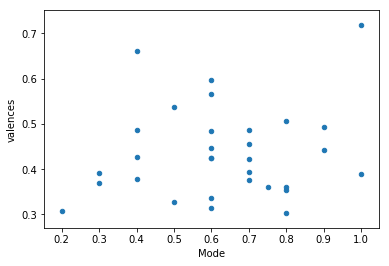

In [88]:
plot1.plot(kind='scatter',x='Mode',y='valences')

In [89]:
cardi=mydf[mydf['Artist Name']=='Cardi B']

In [90]:
cardi['Tracks']=np.arange(0,10)
cardi

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Artist Name,trackid,keys,valences,Mode,Tracks
0,Cardi B,6V1bu6o1Yo5ZXnsCJU8Ovk,0,0.448,1,0
1,Cardi B,2j5hsQvApottzvTn4pFJWF,5,0.419,0,1
2,Cardi B,4llK75pXNWZz6KAho2Gp16,0,0.510,0,2
3,Cardi B,2iuZJX9X9P0GKaE93xcPjk,1,0.884,1,3
4,Cardi B,4gbVRS8gloEluzf0GzDOFc,1,0.879,0,4
5,Cardi B,6ECp64rv50XVz93WvxXMGF,5,0.755,0,5
6,Cardi B,1nueTG77MzNkJTKQ0ZdGzT,7,0.418,1,6
7,Cardi B,1LmN9SSHISbtp9LoaR5ZVJ,4,0.523,1,7
8,Cardi B,6OEHjJJvdkk1Ln0p0AZdyz,0,0.377,1,8
9,Cardi B,6AvfZXpbb6r35DfF7gHPRq,8,0.452,1,9


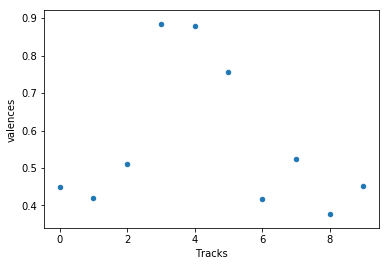

In [91]:
np.arange(0,10)
cardi.plot.scatter(x='Tracks',y='valences')


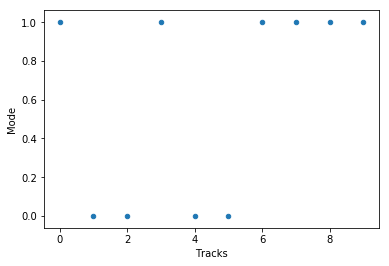

In [92]:
cardi.plot.scatter(x='Tracks',y='Mode')

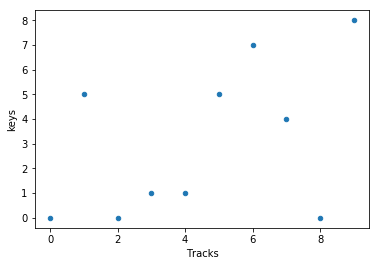

In [93]:
cardi.plot.scatter(x='Tracks',y='keys')

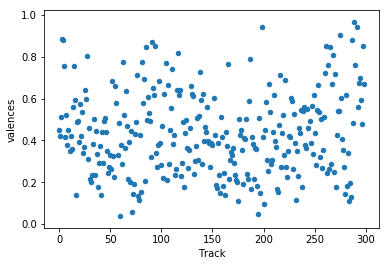

In [94]:
mydf['Track']=np.arange(0,299)
mydf.plot.scatter(x='Track',y='valences')

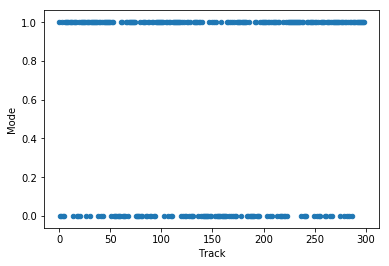

In [95]:
mydf.plot.scatter(x='Track',y='Mode')

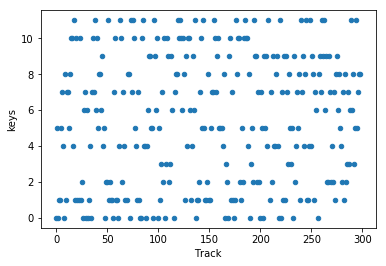

In [96]:
mydf.plot.scatter(x='Track',y='keys')